In [1]:
import pyspark as ps    # for the pyspark suite
from pyspark.sql.types import *
from datetime import datetime
import json

spark = ps.sql.SparkSession.builder \
            .master("local[4]") \
            .appName("sparkSQL exercise") \
            .getOrCreate()

sc = spark.sparkContext 

In [2]:
def apply_json(input_lst):
    try:
        return json.loads(input_lst)#['animals'][0]                                               
    except:
        return None #None None None None None None None 

In [3]:
# data_filepath = '../data/json_dump/output_4994.json'
# data_filepath = '../src/big_json_subset_copy.json'
# data_filepath = '../src/big_json_201MB.json'
data_filepath = '../src/big_json_v2.json'


data = sc.textFile(data_filepath).map(apply_json) #reads in the json file

In [4]:
print(data)
#create a pipeline to mash dataframes

# df_temp = spark.read.json(data_filepath, multiLine = True)

PythonRDD[2] at RDD at PythonRDD.scala:53


In [5]:
#remove outer dictionary from every file


In [6]:
df = spark.read.json(data_filepath, multiLine = True)

In [7]:
df.count()

1400

In [8]:
df.show(20)

+--------------------+-----+--------------------+--------------------+----+--------------------+--------------------+--------------------+--------+--------------------+------+--------+---------------+----------------------+---------------+--------------------+---------------------+--------------------+------+-------+-------+--------------------+----+----+--------------------+------+
|              _links|  age|          attributes|              breeds|coat|              colors|             contact|         description|distance|         environment|gender|      id|           name|organization_animal_id|organization_id|              photos|primary_photo_cropped|        published_at|  size|species| status|   status_changed_at|tags|type|                 url|videos|
+--------------------+-----+--------------------+--------------------+----+--------------------+--------------------+--------------------+--------+--------------------+------+--------+---------------+----------------------+-----

In [9]:
# %%writefile initial_schema.py 
df.printSchema()


root
 |-- _links: struct (nullable = true)
 |    |-- organization: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- self: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |    |-- type: struct (nullable = true)
 |    |    |-- href: string (nullable = true)
 |-- age: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- declawed: boolean (nullable = true)
 |    |-- house_trained: boolean (nullable = true)
 |    |-- shots_current: boolean (nullable = true)
 |    |-- spayed_neutered: boolean (nullable = true)
 |    |-- special_needs: boolean (nullable = true)
 |-- breeds: struct (nullable = true)
 |    |-- mixed: boolean (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: string (nullable = true)
 |    |-- unknown: boolean (nullable = true)
 |-- coat: string (nullable = true)
 |-- colors: struct (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: stri

In [10]:
# dogs = parts.map(lambda p: Row(id=p[0],
#  age=int(p[1].strip())))



In [32]:
df.na.drop().show()

+------+---+----------+------+----+------+-------+-----------+--------+-----------+------+---+----+----------------------+---------------+------+---------------------+------------+----+-------+------+-----------------+----+----+---+------+
|_links|age|attributes|breeds|coat|colors|contact|description|distance|environment|gender| id|name|organization_animal_id|organization_id|photos|primary_photo_cropped|published_at|size|species|status|status_changed_at|tags|type|url|videos|
+------+---+----------+------+----+------+-------+-----------+--------+-----------+------+---+----+----------------------+---------------+------+---------------------+------------+----+-------+------+-----------------+----+----+---+------+
+------+---+----------+------+----+------+-------+-----------+--------+-----------+------+---+----+----------------------+---------------+------+---------------------+------------+----+-------+------+-----------------+----+----+---+------+



In [31]:
df.count()

1400

In [116]:
df_breed = df.select('id', 'age', 'gender', 'breeds', 'description', \
                     'status', 'photos', 'status_changed_at', 'species', \
                     df.species.like("Dog")) 

In [107]:
df_breed1 = df_breed.na.drop()

In [120]:
# df_breed1.filter(df["species"]=="Dog").show()
df.filter(df.species == 'Dog').count()
df.groupby('status').agg({'status': 'count'}).sort(("count(status)")).show()

+---------+-------------+
|   status|count(status)|
+---------+-------------+
|adoptable|          440|
|  adopted|          960|
+---------+-------------+



In [121]:
df_breed1 = df.filter(df.species == 'Dog').count()


In [124]:
df.count()

1400

In [126]:
df_clean_breed = df_breed.na.fill('DUMMY_TEXT').show()

+--------+-----+------+--------------------+--------------------+-------+--------------------+--------------------+-------+----------------+
|      id|  age|gender|              breeds|         description| status|              photos|   status_changed_at|species|species LIKE Dog|
+--------+-----+------+--------------------+--------------------+-------+--------------------+--------------------+-------+----------------+
|48734452|Adult|  Male|[true, Chihuahua,...|Dexter is a cute ...|adopted|                  []|2020-08-10T03:39:...|    Dog|            true|
|48734448|Young|  Male|[false, Tabby,, f...|          DUMMY_TEXT|adopted|                  []|2020-08-10T03:38:...|    Cat|           false|
|48734449|Young|Female|[false, Domestic ...|          DUMMY_TEXT|adopted|                  []|2020-08-10T03:38:...|    Cat|           false|
|48734431|Young|Female|[false, Great Dan...|You can fill out ...|adopted|[[https://dl5zpyw...|2020-08-10T03:23:...|    Dog|            true|
|48734430| Ba

In [71]:
df_breed.show()

+--------+-----+------+--------------------+--------------------+-------+--------------------+--------------------+-------+----------------+
|      id|  age|gender|              breeds|         description| status|              photos|   status_changed_at|species|species LIKE dog|
+--------+-----+------+--------------------+--------------------+-------+--------------------+--------------------+-------+----------------+
|48734452|Adult|  Male|[true, Chihuahua,...|Dexter is a cute ...|adopted|                  []|2020-08-10T03:39:...|    Dog|           false|
|48734448|Young|  Male|[false, Tabby,, f...|                null|adopted|                  []|2020-08-10T03:38:...|    Cat|           false|
|48734449|Young|Female|[false, Domestic ...|                null|adopted|                  []|2020-08-10T03:38:...|    Cat|           false|
|48734431|Young|Female|[false, Great Dan...|You can fill out ...|adopted|[[https://dl5zpyw...|2020-08-10T03:23:...|    Dog|           false|
|48734430| Ba

In [72]:
df_breed_dropna = df_breed.na.drop()

In [73]:
df_breed_dropna.show()

+--------+-----+------+--------------------+--------------------+-------+--------------------+--------------------+-------+----------------+
|      id|  age|gender|              breeds|         description| status|              photos|   status_changed_at|species|species LIKE dog|
+--------+-----+------+--------------------+--------------------+-------+--------------------+--------------------+-------+----------------+
|48734452|Adult|  Male|[true, Chihuahua,...|Dexter is a cute ...|adopted|                  []|2020-08-10T03:39:...|    Dog|           false|
|48734431|Young|Female|[false, Great Dan...|You can fill out ...|adopted|[[https://dl5zpyw...|2020-08-10T03:23:...|    Dog|           false|
|48734430| Baby|  Male|[true, Domestic S...|HUBBLE is a super...|adopted|[[https://dl5zpyw...|2020-08-10T03:22:...|    Cat|           false|
|48734406|Young|Female|[true, Domestic S...|Hi. I&amp;#39;m M...|adopted|[[https://dl5zpyw...|2020-08-10T03:08:...|    Cat|           false|
|48734405|You

In [127]:
df_breed_dropna.count()

1137

In [60]:
df_breed_dropna.printSchema()

root
 |-- id: long (nullable = true)
 |-- age: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- breeds: struct (nullable = true)
 |    |-- mixed: boolean (nullable = true)
 |    |-- primary: string (nullable = true)
 |    |-- secondary: string (nullable = true)
 |    |-- unknown: boolean (nullable = true)
 |-- description: string (nullable = true)
 |-- status: string (nullable = true)
 |-- photos: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- full: string (nullable = true)
 |    |    |-- large: string (nullable = true)
 |    |    |-- medium: string (nullable = true)
 |    |    |-- small: string (nullable = true)
 |-- status_changed_at: string (nullable = true)
 |-- species: string (nullable = true)



In [61]:
# dropped_df.createOrReplaceTempView("dog_data")
df_breed_dropna.createOrReplaceTempView("breed_data")

In [133]:
result = spark.sql('''SELECT gender, breeds,age, status, species,
                        COUNT(*) AS Number
                        FROM breed_data
                        WHERE species=='Dog' and status=='adopted'
                        GROUP BY gender, breeds, age, status, species
                        ORDER BY COUNT(*) desc''')
result.show(20)

+------+--------------------+-----+-------+-------+------+
|gender|              breeds|  age| status|species|Number|
+------+--------------------+-----+-------+-------+------+
|  Male|[true, Terrier, C...|Young|adopted|    Dog|    30|
|  Male|[true, Labrador R...|Young|adopted|    Dog|    20|
|Female|[true, Chihuahua,...|Young|adopted|    Dog|    17|
|Female|[true, Poodle,, f...|Young|adopted|    Dog|    16|
|Female|[true, Shepherd,,...|Young|adopted|    Dog|    15|
|  Male|[true, Pit Bull T...| Baby|adopted|    Dog|    12|
|  Male|[true, German She...| Baby|adopted|    Dog|    11|
|Female|[true, Maltese, P...|Young|adopted|    Dog|    10|
|Female|[false, Husky,, f...|Young|adopted|    Dog|    10|
|  Male|[true, Yorkshire ...|Young|adopted|    Dog|    10|
|Female|[true, Jack Russe...|Adult|adopted|    Dog|     9|
|  Male|[true, Jack Russe...|Young|adopted|    Dog|     9|
|Female|[true, Labrador R...|Young|adopted|    Dog|     8|
|Female|[false, Australia...|Young|adopted|    Dog|     

In [141]:
result = spark.sql('''SELECT gender, breeds,age, status, species,
                        COUNT(*) AS Number
                        FROM breed_data
                        WHERE species=='Dog' and status=='adoptable'
                        GROUP BY gender, breeds, age, status, species
                        ORDER BY COUNT(*) desc''')
result.show(20)

+------+--------------------+------+---------+-------+------+
|gender|              breeds|   age|   status|species|Number|
+------+--------------------+------+---------+-------+------+
|Female|[true, Mixed Bree...| Adult|adoptable|    Dog|     8|
|  Male|[false, Mixed Bre...|  Baby|adoptable|    Dog|     6|
|Female|[false, Pit Bull ...| Adult|adoptable|    Dog|     6|
|  Male|[true, Shiba Inu,...|  Baby|adoptable|    Dog|     5|
|  Male|[true, Mixed Bree...|  Baby|adoptable|    Dog|     5|
|Female|[true, Terrier,, ...| Young|adoptable|    Dog|     5|
|  Male|[false, Dachshund...| Adult|adoptable|    Dog|     5|
|Female|[true, Labrador R...|  Baby|adoptable|    Dog|     5|
|Female|[true, Shepherd,,...|  Baby|adoptable|    Dog|     4|
|  Male|[true, American B...| Young|adoptable|    Dog|     4|
|  Male|[true, Pit Bull T...| Adult|adoptable|    Dog|     4|
|  Male|[true, German She...|  Baby|adoptable|    Dog|     4|
|  Male|[true, Terrier, M...| Adult|adoptable|    Dog|     4|
|  Male|

In [109]:
result = spark.sql('''SELECT gender, 
                            age,
                            COUNT(*) AS Count
                        FROM dog_data
                        GROUP BY gender, age
                        ORDER BY count desc''')
result.show(20)

AnalysisException: Table or view not found: dog_data; line 4 pos 29;
'Sort ['count DESC NULLS LAST], true
+- 'Aggregate ['gender, 'age], ['gender, 'age, count(1) AS Count#2993L]
   +- 'UnresolvedRelation [dog_data]


In [ ]:
result.show()

In [ ]:
result.head(20)

In [135]:
plot_breed = result.toPandas()
plot_breed['Number']
plot_breed.dropna(inplace=True)

In [136]:
plot_breed

,gender,breeds,age,status,species,Number
0,Female,"(True, Mixed Breed, None, False)",Adult,adoptable,Dog,8
1,Male,"(False, Mixed Breed, None, False)",Baby,adoptable,Dog,6
2,Female,"(False, Pit Bull Terrier, None, False)",Adult,adoptable,Dog,6
3,Female,"(True, Labrador Retriever, Pit Bull Terrier, F...",Baby,adoptable,Dog,5
4,Male,"(True, Shiba Inu, Retriever, False)",Baby,adoptable,Dog,5
...,...,...,...,...,...,...
179,Male,"(True, Cocker Spaniel, None, False)",Young,adoptable,Dog,1
180,Male,"(False, Mixed Breed, None, False)",Adult,adoptable,Dog,1
181,Male,"(False, Great Pyrenees, None, False)",Young,adoptable,Dog,1
182,Female,"(True, Shepherd, Terrier, False)",Young,adoptable,Dog,1


NameError: name 'plot_gender' is not defined

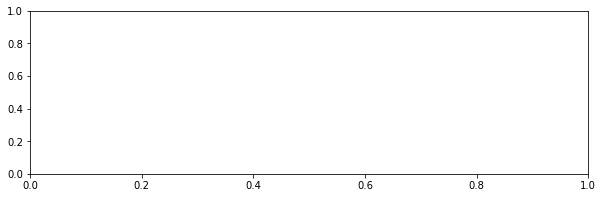

In [138]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10,3))
ax.bar(x = plot_gender['age'], height=plot_gender['Count'])
ax.set_title("Count of Dogs by Gender")

ax.set_xlabel('Gender')
ax.set_ylabel('Number of Dogs')
plt.tight_layout()
plt.show()

In [ ]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16)
plt.close('all')
N = 4
menMeans = (25001, 2620, 5000, 0)
womenMeans = (2623, 17379, 22375, 1)
menStd = (1, 1, 1, 100)
womenStd = (1, 1, 1, 100)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd, color=['pink'])
p2 = plt.bar(ind, womenMeans, width,bottom=menMeans, yerr=womenStd, color=['blue'])

plt.ylabel('Number of Dogs', fontsize=17)
plt.title('Dogs In Shelters By Age and Gender', fontsize=18)
plt.xticks(ind, ('Baby', 'Young', 'Adult', 'Senior'))
plt.yticks(np.arange(0, 35000, 10000))
plt.figtext(0.8, 0.25, 
            "1 Senior", 
            horizontalalignment ="center",  
            verticalalignment ="center",  
            wrap = True, fontsize = 14,  
            color ="black") 
plt.figtext(0.8, 0.19, 
            "Female", 
            horizontalalignment ="center",  
            verticalalignment ="center",  
            wrap = True, fontsize = 14,  
            color ="black") 
plt.legend((p1[0], p2[0]), ('Female', 'Male'))

plt.show()
plt.savefig('../src/readme/by_age_and_gender');

In [ ]:

plt.figtext(0.55, 0.7, 
            "1 Senior Female", 
            horizontalalignment ="right",  
            verticalalignment ="center",  
            wrap = True, fontsize = 14,  
            color ="black") 



import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()